#### sklearn.ensemble.RandomForestClassifier
- class sklearn.ensemble.RandomForestClassifier(n_estimators=100(개수 설정하지 않으면 기본이 100개의 나무로 실행), *, criterion='gini'(분류할 때 무엇을 기준으로 할 것인가), max_depth=None(기본이 5개), min_samples_split=2(몇 개로 분기하냐), min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

feature_name_df = pd.read_csv("C:\\Users\\SAMSUNG\\Documents\\vscode\\2024\\ML\\Datasets\\UCI HAR Dataset\\features.txt", sep='\s+', 
            header=None, names=['column_index','column_name'])
feature_name = feature_name_df.iloc[:, 1].values.tolist()

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_1792\50679172.py:4: SyntaxWarning: invalid escape sequence '\s'
  feature_name_df = pd.read_csv("C:\\Users\\SAMSUNG\\Documents\\vscode\\2024\\ML\\Datasets\\UCI HAR Dataset\\features.txt", sep='\s+',
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_1792\50679172.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import pandas as pd
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                 columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+
                                                                                              str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [3]:
get_new_feature_name_df(feature_name_df)

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_1792\2006025054.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  str(x[1]) if x[1] > 0 else x[0], axis=1)
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_1792\2006025054.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+


,column_index,column_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0
...,...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)",0
557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,559,"angle(X,gravityMean)",0
559,560,"angle(Y,gravityMean)",0


In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
def get_human_dataset():
    # 각 데이터 파일이 공백으로 분리되어 있어, 공백문자를 sep로 할당
    feature_name_df = pd.read_csv("C:\\Users\\SAMSUNG\\Documents\\vscode\\2024\\ML\\Datasets\\UCI HAR Dataset\\features.txt", sep=' ',
                                 header=None, names=['column_index', 'column_name'])
    # 중복 이름 변경
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    x_train = pd.read_csv('C:\\Users\\SAMSUNG\\Documents\\vscode\\2024\\ML\\Datasets\\UCI HAR Dataset/train/X_train.txt', sep='\s+', names=feature_name)
    x_test = pd.read_csv('C:\\Users\\SAMSUNG\\Documents\\vscode\\2024\\ML\\Datasets\\UCI HAR Dataset/test/X_test.txt', sep='\s+', names=feature_name)
    
    y_train = pd.read_csv('C:\\Users\\SAMSUNG\\Documents\\vscode\\2024\\ML\\Datasets\\UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('C:\\Users\\SAMSUNG\\Documents\\vscode\\2024\\ML\\Datasets\\UCI HAR Dataset/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    return x_train, x_test, y_train, y_test

In [10]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_clf = RandomForestClassifier(random_state=42)

# RandomForest
param_rf = {"max_depth" : [5,7,10,16,20,25],
          "min_samples_split" : [2,3]
          }

gscv_dt = GridSearchCV(estimator = rf_clf, param_grid = param_rf, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=0)
gscv_dt = gscv_dt.fit(X_train, y_train)

C:\Users\SAMSUNG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\SAMSUNG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\SAMSUNG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [5, 7, 10, 16, 20, 25],
                         'min_samples_split': [2, 3]},
             scoring='accuracy')

In [11]:
gscv_dt.best_params_

{'max_depth': 7, 'min_samples_split': 2}

In [12]:
gscv_dt.best_score_

0.9148543562671906

In [13]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

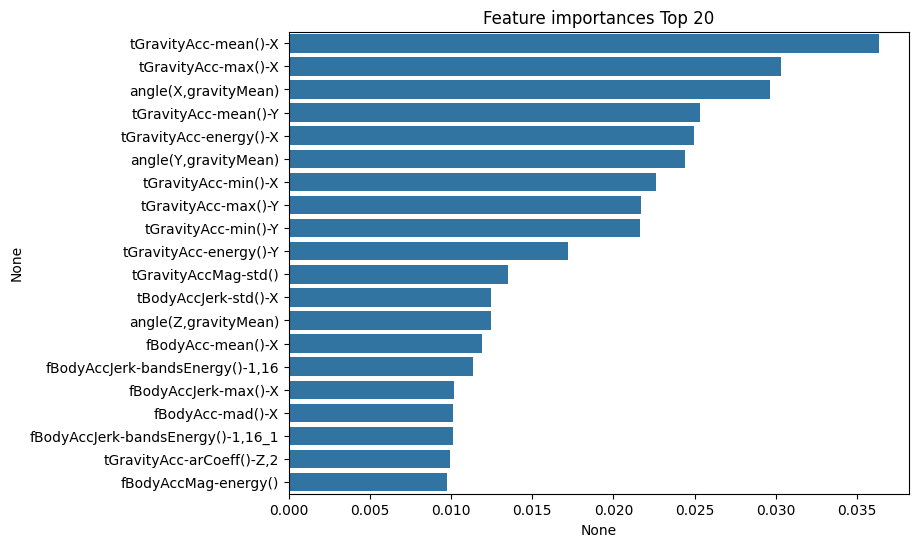

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

In [16]:
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
list(ftr_top20.index)

['tGravityAcc-mean()-X',
 'tGravityAcc-max()-X',
 'angle(X,gravityMean)',
 'tGravityAcc-mean()-Y',
 'tGravityAcc-energy()-X',
 'angle(Y,gravityMean)',
 'tGravityAcc-min()-X',
 'tGravityAcc-max()-Y',
 'tGravityAcc-min()-Y',
 'tGravityAcc-energy()-Y',
 'tGravityAccMag-std()',
 'tBodyAccJerk-std()-X',
 'angle(Z,gravityMean)',
 'fBodyAcc-mean()-X',
 'fBodyAccJerk-bandsEnergy()-1,16',
 'fBodyAccJerk-max()-X',
 'fBodyAcc-mad()-X',
 'fBodyAccJerk-bandsEnergy()-1,16_1',
 'tGravityAcc-arCoeff()-Z,2',
 'fBodyAccMag-energy()']

In [17]:
feature_selected_train = X_train[list(ftr_top20.index)]
feature_selected_test =X_test[list(ftr_top20.index)]

In [18]:
X_test[list(ftr_top20.index)]

,tGravityAcc-mean()-X,tGravityAcc-max()-X,"angle(X,gravityMean)",tGravityAcc-mean()-Y,tGravityAcc-energy()-X,"angle(Y,gravityMean)",tGravityAcc-min()-X,tGravityAcc-max()-Y,tGravityAcc-min()-Y,tGravityAcc-energy()-Y,tGravityAccMag-std(),tBodyAccJerk-std()-X,"angle(Z,gravityMean)",fBodyAcc-mean()-X,"fBodyAccJerk-bandsEnergy()-1,16",fBodyAccJerk-max()-X,fBodyAcc-mad()-X,"fBodyAccJerk-bandsEnergy()-1,16_1","tGravityAcc-arCoeff()-Z,2",fBodyAccMag-energy()
0,0.936489,0.906083,-0.720009,-0.282719,0.829297,0.276801,0.944461,-0.279244,-0.262160,-0.864621,-0.705191,-0.906683,-0.057978,-0.918510,-0.998040,-0.948634,-0.930680,-0.998642,0.987180,-0.953984
1,0.927404,0.856176,-0.698091,-0.289215,0.805575,0.281343,0.944461,-0.304870,-0.262160,-0.858163,-0.953902,-0.949204,-0.083898,-0.960903,-0.999641,-0.977395,-0.975764,-0.999648,0.869290,-0.998476
2,0.929915,0.856269,-0.702771,-0.287513,0.812044,0.280083,0.948704,-0.304870,-0.261661,-0.859947,-0.979083,-0.991070,-0.079346,-0.991906,-0.999954,-0.994663,-0.993941,-0.999423,0.440302,-0.999570
3,0.928881,0.856269,-0.698954,-0.293396,0.809379,0.284114,0.947309,-0.305101,-0.272916,-0.853713,-0.977016,-0.990802,-0.077108,-0.993030,-0.999949,-0.993967,-0.994053,-0.999387,0.303787,-0.999504
4,0.926600,0.853942,-0.692245,-0.302961,0.803500,0.290722,0.946221,-0.312552,-0.279190,-0.843378,-0.976893,-0.992072,-0.073857,-0.992404,-0.999955,-0.995519,-0.993104,-0.999631,0.544317,-0.999500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.890968,0.823272,-0.651732,-0.276718,0.712964,0.274627,0.903413,-0.278442,-0.272203,-0.870515,-0.234388,-0.416725,0.184784,-0.335539,-0.792017,-0.445064,-0.240594,-0.877920,0.276318,-0.702110
2943,0.891281,0.823272,-0.655181,-0.274976,0.713748,0.273578,0.903793,-0.278442,-0.268172,-0.872342,-0.198627,-0.362099,0.182412,-0.250424,-0.807522,-0.616711,-0.181938,-0.811476,0.451176,-0.674032
2944,0.890897,0.822107,-0.655357,-0.276165,0.712784,0.274479,0.903793,-0.273818,-0.268172,-0.871197,-0.252388,-0.389349,0.181184,-0.362640,-0.830224,-0.564495,-0.301743,-0.825339,0.548766,-0.715711
2945,0.892736,0.823679,-0.659719,-0.262356,0.717394,0.264782,0.909007,-0.272785,-0.244744,-0.884788,-0.292705,-0.441808,0.187563,-0.378365,-0.838522,-0.590170,-0.308029,-0.892434,0.438785,-0.745225
